In [11]:
#Distribute N brothers inside a rectangle of given dimension such that min distance between each pair is maximum
#max(xi, yi) J = r
#such that:
#          (xi - xj)^2 + (yi - yj)^2 >= r^2
#          0 <= xi <= 1
#          0 <= yi <= 1

In [12]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import random

In [13]:
model = AbstractModel()
model.N = Param(mutable=True)
#Set of brothers
model.i = RangeSet(1, model.N)
#j is alias of set i
model.j = Set(initialize=model.i)
#L is dimension of board
model.L = Param(initialize=1,mutable=True)

#To randomly initialize x and y with a number between 0 and 1
def initval(model,i):
    return random.uniform(0, 1)


model.x = Var(model.i, bounds=(0,model.L), within=NonNegativeReals, initialize=initval)
model.y = Var(model.i, bounds=(0,model.L), within=NonNegativeReals, initialize=initval)
model.r = Var(within=NonNegativeReals)

def C1_rule(model, i, j):
    #only define distance for different brothers
    if i!=j:
        return (model.x[i] - model.x[j])**2 + (model.y[i] - model.y[j])**2 >= model.r**2
    #do not define distance for the same brothers
    else:
        return Constraint.Skip

model.C = Constraint(model.i, model.j, rule=C1_rule)
model.obj = Objective(expr=model.r, sense=maximize)
opt = SolverFactory('ipopt')

In [14]:
#instance = model.create_instance("EX11.dat")
model.N = 50
instance = model.create_instance()
results = opt.solve(instance) #solves and updates instance

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)


Min distance is  0.165


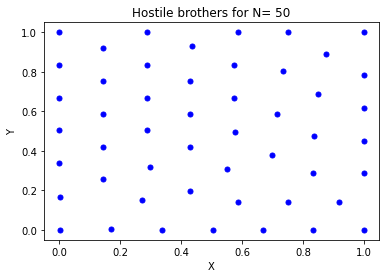

In [15]:
X = [value(instance.x[i]) for i in instance.i]
Y = [value(instance.y[i]) for i in instance.i]
plt.scatter(X, Y, s=25, color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hostile brothers for N= ' + str(value(instance.N)))
print('Min distance is ', round(value(instance.r), 3))